###  Q-learning and Reinforcement learning, FrozenLake Environment, Default Grid

<h3>Importing the library modules and make the environment</h3>

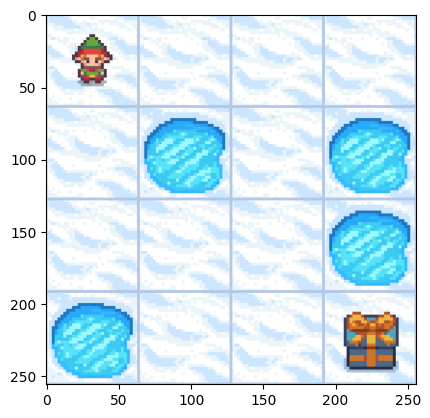

In [ ]:
# import necessary modules
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# create the FrozenLake environment, DISABLE SLIPPERY
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")

# Here, the height and width are inverted
grid_height, grid_width  = env.unwrapped.desc.shape

# the environment has to be set at reset
env.reset()
plt.imshow(env.render())

<h2>Concept of Reinforcement Learning in Frozenlake- How it works</h2>


<h4>I think, RL in FrozenLake environment (F),works in such a way that the agent navigates in a 4x4 grid environment (by performing actions) via learning thus avoiding holes (H) and reaching the goal (G). It learns through trial and error, receiving rewards for good actions. The Q-table updates based on experience, improving decisions. Which over the time, the agent follows the best path using learned policies that is achieved through training loop until it reaches the goal or fall into the pit depending on the policies.</h4>



### In the RL environments frozen_lake below are the following terms useful in understanding the Frozenlake

### Environment- is the area or world environment where the agent interacts in the frozenlake and the environment type is grids where it comes up with optimal decision (actions) towards the reward. The grids have the S (agent starts its move), F (the safe tiles), H (here is where the fall happens) and G (Goal: the agent target).

### Agent- agent (which is the Élf-the trained player) interacts within the environment via taking actions. And in FrozenLake, the agent moves through the grids, choosing actions (left, right, up, down) to reach the goal/reward (G) while avoiding holes (H).

### State- it is the current state of the agent in the environment with every information about the environment. It is usually represented as integer (in list: [0, 0] or [0, 1]) which corresponded to the current state position.

### Observation- in the frozenlake, the observation represents the player's (Agent/Elf) current position within the grid. In this instance it has partial information regarding the environment.

### Reward- in the frozenlake environment, the reward is the target goal (G) for the agent. It is a numerical values -1, +1 or 0 that the Agent learnt about the success or failure of its actions. That during the learning process, it allows the agent to improve its policy and make better decisions over time.

### Agent and Policy- it is the strategy or rule that the agent uses to choose actions in a given state within the environment. The Agent and Policy maps each state of the environment to a specific action and the goal of reinforcement learning is to find the optimal policy, that maximizes the expected cumulative rewards.

<h4>Use Q-Learning and Reinforcement for the elf to move</h4>

In [3]:
# inspecting the environment
print("Observation space:")
print(env.observation_space)

print("\nAction space")
print(env.action_space)


Observation space:
Discrete(16)

Action space
Discrete(4)


### The Q_table can be referred to as quality in RL which stores values for each possible action in each possible state (environment).

### Bellman's Equation is a key concept in reinforcement learning which helps agents make decisions in complex situations by assessing possible future states and rewards. It is a recursive formula used in decision-making and reinforcement learning which simply breaks down a complex problem into smaller steps, making it easier to solve. 

### Q_table = np.zeros([env.observation_space.n, env.action_space.n]). The np.zeros() creates a 2D array (16x4 matrix) filled with zeros, env.observation_space.n represents the total number of possible states in the environment i.e in the Frozen Lake 4x4 grid, which is 16 states, env.action_space.n represents the total number of possible actions i.e  in the Frozen Lake environment, this is 4 actions (left, down, right, up). Basically, the Q_table is the Agent knowledge representation about the state of the environment.

### Q-Learning is a model-free reinforcement learning algorithm which helps an agent learn the optimal policy for decision-making. The Q-Learning equation enables the agent to maximize cumulative rewards by updating a Q-table based on past experiences, without requiring prior knowledge of the environment's dynamics.

### Q-Learning formula: Q(s,a) = Q(s, a) + alpha * (r + y * max(Q(s',a')) - Q(s, a))

### Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

### Q[state, action]: it is the current Q-value for the given state-action pair.

### reward (r): it is the reward received after taking the action in the given state.

### State (s): The current state (information) of the agent in the environment.

### action (a): The action taken by the agent in the current state.

### next_state: it is the state the agent transitions to after performing the action in the current state.

### 



### Exploration / Exploitation

### Exploration: this is when the agent tries new actions to discover more about the environment. This helps in finding better long-term strategies but may lead to short-term losses while Exploitation: the agent chooses the best-known action based on past experiences (Q-values) to maximize rewards immediately. The Exploration / Exploitation is often refer to as epsilon-greedy strategy.

### Variables: alpha, epsilon, decay, gamma

### alpha: could be referred to as the learning rate that determines how much new information (the reward and future Q-values) overrides the old information in the Q-table. A value close to 1 gives more weight to new information, while a value close to 0 prioritizes the existing values in Q.

### gamma: could be known as the profit, which determines the importance of future rewards compared to immediate rewards. A value close to 1 makes future rewards highly significant, while a value close to 0 focuses more on immediate rewards.

### decay: in the concept of frozenlake environment, it refers to the gradual reduction of certain parameters or values over time or iterations. Basically reduce the wild guessing, the effect or the value of the epsilon during the training.

### Epsilon (ε) often starts with a higher value to encourage exploration (wild guessing ) early in the training process and then reduced towards the of the training process.

In [4]:
# this is the table that is used in Q-learning
Q_table = np.zeros([env.observation_space.n, env.action_space.n])
Q_table.shape

(16, 4)

Q-Learning formula

Q(s,a) = Q(s, a) + alpha * (r + y * max(Q(s',a')) - Q(s, a))

In [5]:
# created the function that update the Q-Learning
def calculate_value(Q, state, action, reward, next_state, alpha, gamma):
    Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
    return Q

In [ ]:
#  An helper function is created to visualize the highest Q-values in the grid
def summarize_best_values(q_table, grid_width, grid_height):

    best_values = np.max(q_table, axis=1)

    return best_values.reshape(grid_width, grid_height)

In [ ]:
# The number of times my agent moves
total_episodes = 10000

# it is the number of steps (50) the agent take in one episodes
max_steps = 50

# the alpha: helps to update to values 
# during the training process
# However, in this case
# it takes mid updates to the values 
# also, remember past experience quickly
learning_rate = 0.5

# the gamma controls the ratio between the long 
# and short term reward
# in this case, I started with 0.9 
# so that the agent can learn about 
# making long term decicions towards the rewards
# as much as immediate reward as well as 
gamma = 0.9

# this is the first optimal step
# which set at 0.9 because it has to start guessing 
# till the value redueces and then stop guessing
# to learning how to trust 
epsilon = 0.9

max_epsilon = 0.9

min_epsilon = 0.01

# this reduce the effect of epsilon (wild guessing)
# and helping the 'Agent' to
# rely more on the what it has learnt
# i.e knowledge or past experiences 
# which involes the state and actions
# within the defined environment
# This essentially give awareness to the Agent
# about the reward
decay_rate = 0.0005

### Train the agent with a for-loop (based on episodes)

In [ ]:
# https://pypi.org/project/gym-super-mario-bros/
for episode in range(total_episodes):

    state, info = env.reset()

    done = False

    total_rewards = 0

    for step in range(max_steps):
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(Q_table[state, :])
        else:
            # action: up, down, right and left
            action = env.action_space.sample()


        observation, reward, done, truncated, info = env.step(action)

        Q_table = calculate_value(Q_table, state, action, reward, observation, learning_rate, gamma)

        state = observation
        total_rewards = total_rewards + reward

        if done:
            print(f"Steps taken: {step}")
            break

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(- decay_rate * episode)
    print(f"Episode {episode} done with total rewards:  {total_rewards}, epsilon: {epsilon}")

Steps taken: 2
Episode 0 done with total rewards:  0.0, epsilon: 0.9
Steps taken: 1
Episode 1 done with total rewards:  0.0, epsilon: 0.8995551112314607
Steps taken: 9
Episode 2 done with total rewards:  0.0, epsilon: 0.8991104448517038
Steps taken: 6
Episode 3 done with total rewards:  0.0, epsilon: 0.8986660007495627
Steps taken: 5
Episode 4 done with total rewards:  0.0, epsilon: 0.8982217788139265
Steps taken: 4
Episode 5 done with total rewards:  0.0, epsilon: 0.8977777789337394
Steps taken: 2
Episode 6 done with total rewards:  0.0, epsilon: 0.897334000998002
Steps taken: 4
Episode 7 done with total rewards:  0.0, epsilon: 0.8968904448957693
Steps taken: 8
Episode 8 done with total rewards:  0.0, epsilon: 0.8964471105161524
Steps taken: 6
Episode 9 done with total rewards:  0.0, epsilon: 0.8960039977483178
Steps taken: 10
Episode 10 done with total rewards:  0.0, epsilon: 0.8955611064814872
Steps taken: 5
Episode 11 done with total rewards:  0.0, epsilon: 0.895118436604938
Steps 

### The epsilon (exploration) wild guessing further minimized (from 0.9 to 0.015999) as the training goes on which then rely on the knowledge learnt and that will equipped the agent to make the optimal decisons towards the rewards in every step.

In [ ]:
# this shows the Q_table
# It basically stores the values and updates
# of every observation and action of the agent
# which can be termed the Agent's knowledge or experience
Q_table

array([[0.531441  , 0.59049   , 0.59049   , 0.531441  ],
       [0.531441  , 0.        , 0.6561    , 0.59049   ],
       [0.59049   , 0.729     , 0.59049   , 0.6561    ],
       [0.6561    , 0.        , 0.59048897, 0.59048979],
       [0.59049   , 0.6561    , 0.        , 0.531441  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.81      , 0.        , 0.6561    ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.6561    , 0.        , 0.729     , 0.59049   ],
       [0.6561    , 0.81      , 0.81      , 0.        ],
       [0.729     , 0.9       , 0.        , 0.729     ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.81      , 0.9       , 0.729     ],
       [0.81      , 0.9       , 1.        , 0.81      ],
       [0.        , 0.        , 0.        , 0.        ]])

In [11]:
# helper function
# 0: Move left, 1: Move down, 2: Move right, 3: Move up 
# import pandas
import pandas as pd
results = summarize_best_values(Q_table, grid_width, grid_height)

df = pd.DataFrame(results)
df

0       1      2       3
0  0.59049  0.6561  0.729  0.6561
1  0.65610  0.0000  0.810  0.0000
2  0.72900  0.8100  0.900  0.0000
3  0.00000  0.9000  1.000  0.0000

### Now, the Q-Learning- -based AI to play the game with the optimized Q-table!

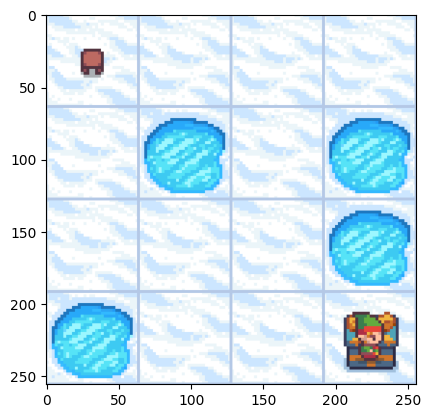

Episode: 5 done with total_rewards: 1.0


In [12]:
env.reset()
clear_output(wait=True)
plt.imshow(env.render())
plt.show()

# for-loop => allow the agent to play this 5 times in a row (5 episodes)
for episode in range(5):
    state, info = env.reset()
    done = False
    total_rewards = 0

    # play for the max number of steps
    for step in range(max_steps):
        # take the best action for this situation from the Q-table
        # basically based on the current cell => choose the best action we have calculated
        # in the Q-table during training

        # an idea for the exercise project:
        # => if multiple identical high values => choose a random path
        action = np.argmax(Q_table[state, :])

        # unpack the results
        observation, reward, done, truncated, info = env.step(action)

        # update total rewards
        total_rewards = total_rewards + reward

        # update the visual frame
        clear_output(wait=True)
        plt.imshow(env.render())
        plt.show()

        # if the game is over either by hole or goal => break the loop
        if done:
            print(f"Episode: {episode + 1} done with total_rewards: {total_rewards}")
            time.sleep(2)
            break

        # save new state as old state, continue with next step
        state = observation
        time.sleep(0.3)

### Study how the Q-table changes as the model is training
### . What is the "trigger" when the zeroes in Q-table start to update towards something better?

### It can seen that the agent learnt its action to follow the environment the pattern as the number (value) increases until towards the reward. As shown below

### 	0	1	2	3
### 0	0.59049	0.6561	0.729	0.6561
### 1	0.65610	0.0000	0.810	0.0000
### 2	0.72900	0.8100	0.900	0.0000
### 3	0.00000	0.9000	1.000	0.0000

### Movement from 0.6561 → 0.729 → 0.810 → 0.900 → 1.000 (best state before goal) → 0.0000 (G).